# Plot Statics

In [90]:
import numpy as np
import numpy.random as rn
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['font.size'] = 9
matplotlib.rcParams['legend.fontsize'] = 8

### Poster Plots ###

In [3]:
dataG_qu = np.array(pd.read_csv(r'C://Users//crh222//Data//RC//Quantum//Statics//Gibbs.csv')) 

data1D_x = np.array(pd.read_csv(r'C://Users//crh222//Data//RC//Quantum//Statics//MFGS_1D_x_prma_100.csv'))
data1D_z = np.array(pd.read_csv(r'C://Users//crh222//Data//RC//Quantum//Statics//MFGS_1D_z_prma_100.csv'))
data2D_xy = np.array(pd.read_csv(r'C://Users//crh222//Data//RC//Quantum//Statics//MFGS_2D_xy_prma_10.csv'))
data2D_xz = np.array(pd.read_csv(r'C://Users//crh222//Data//RC//Quantum//Statics//MFGS_2D_xz_prma_10.csv'))
data3D_xyz = np.array(pd.read_csv(r'C://Users//crh222//Data//RC//Quantum//Statics//MFGS_3D_xyz_prma_5.csv'))

data1D_x_cl = np.array(pd.read_csv(r'C://Users//crh222//Data//RC//Classical//MFGS_1D_x_prma.csv'))
data1D_z_cl = np.array(pd.read_csv(r'C://Users//crh222//Data//RC//Classical//MFGS_1D_z_prma.csv'))
data2D_xy_cl = np.array(pd.read_csv(r'C://Users//crh222//Data//RC//Classical//MFGS_2D_xy_prma.csv'))
data2D_xz_cl = np.array(pd.read_csv(r'C://Users//crh222//Data//RC//Classical//MFGS_2D_xz_prma.csv'))
data3D_xyz_cl = np.array(pd.read_csv(r'C://Users//crh222//Data//RC//Classical//MFGS_3D_xyz_prma.csv'))

data3D_tempo = np.array(pd.read_csv(r'C://Users//crh222//Data//RC//Quantum//Statics//TEMPO.csv'))

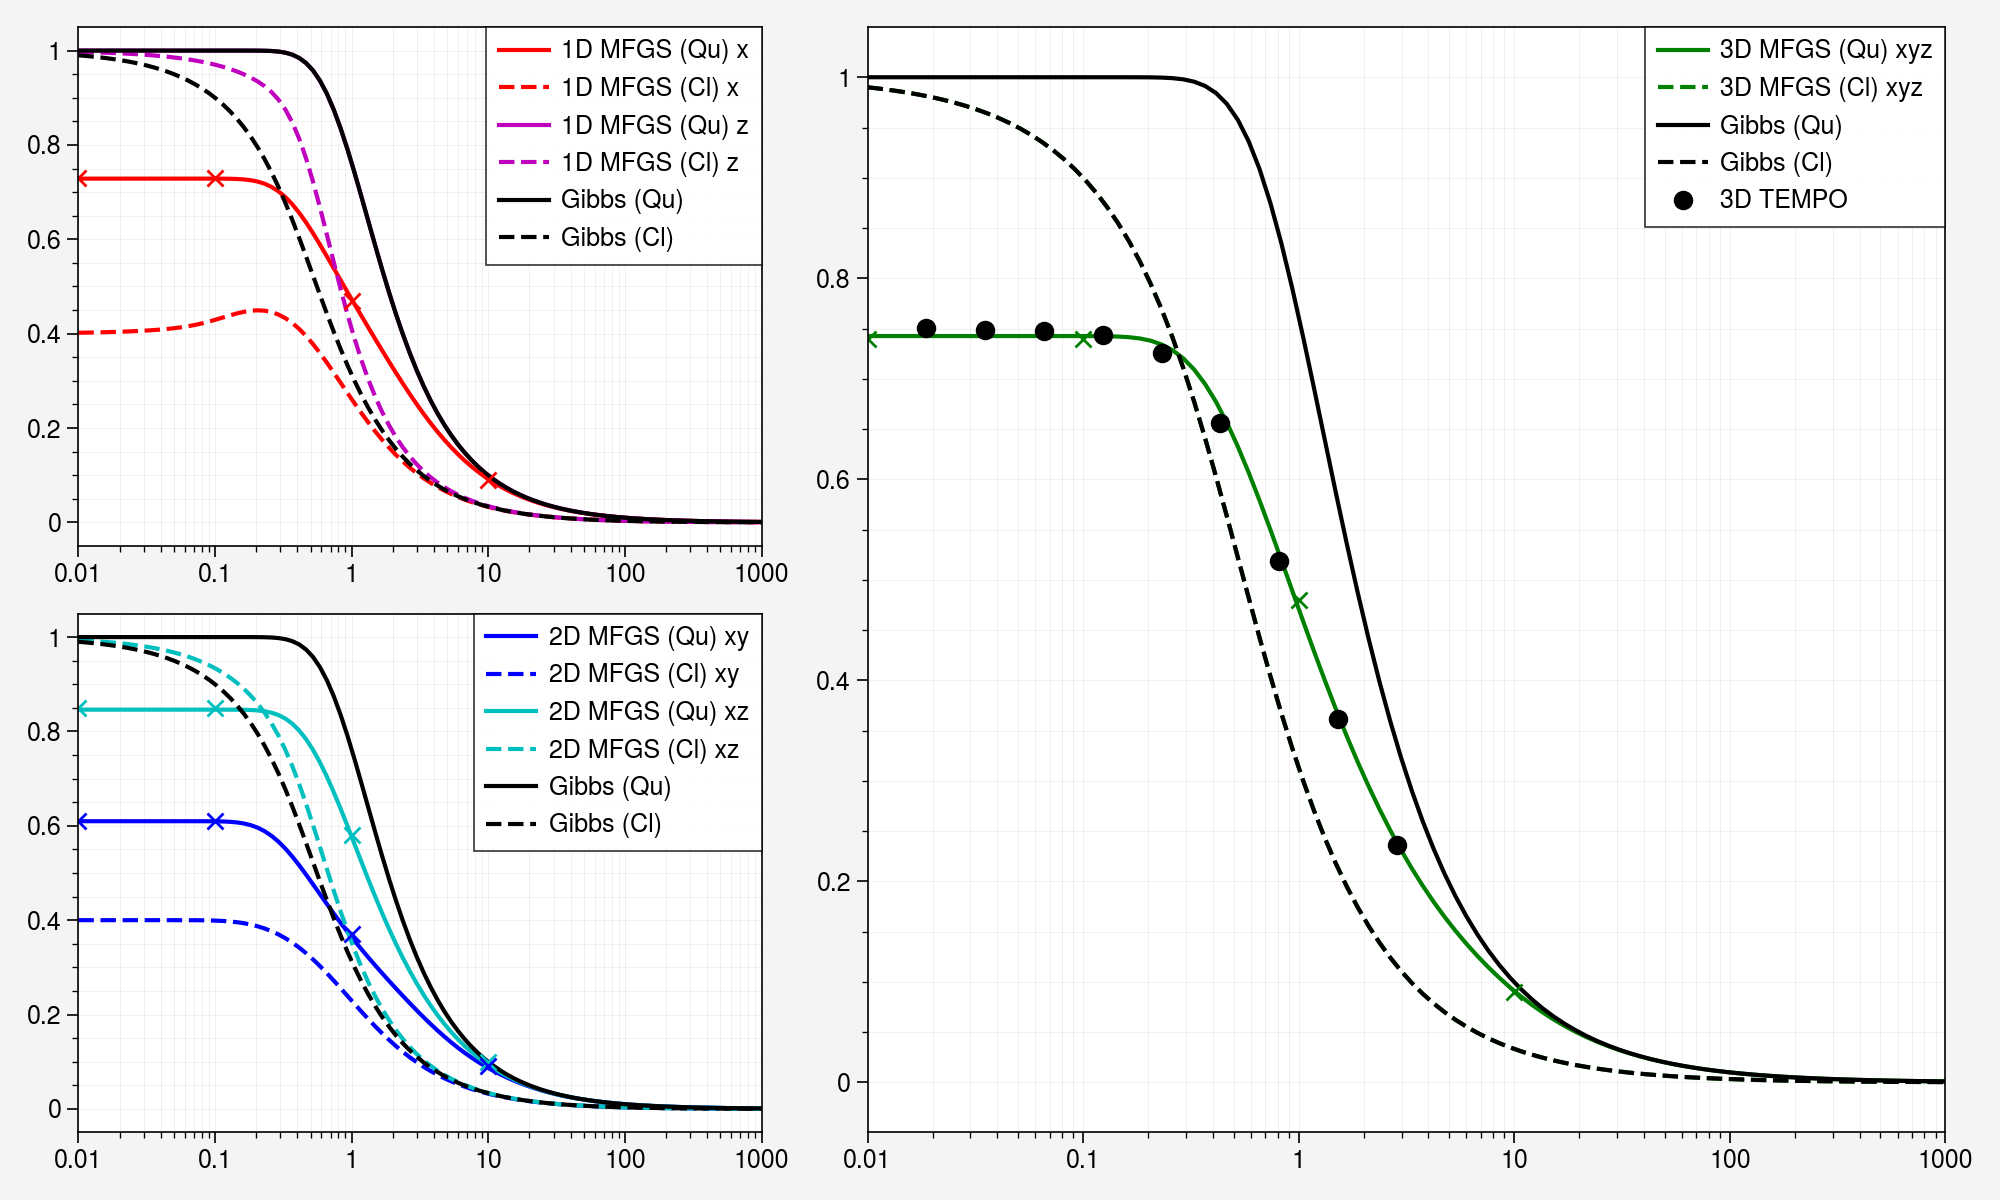

In [66]:
fig = plt.figure()

fig.set_figheight(6)
fig.set_figwidth(10)

ax1 = plt.subplot2grid((2, 5), (0, 0), colspan=2)
ax2 = plt.subplot2grid((2, 5), (1, 0), colspan=2)
ax3 = plt.subplot2grid((2, 5), (0, 2), colspan=3, rowspan=2, sharex=ax1)

ax1.get_xaxis().tick_bottom()
ax1.get_yaxis().tick_left()
ax2.get_xaxis().tick_bottom()
ax2.get_yaxis().tick_left()
ax3.get_xaxis().tick_bottom()
ax3.get_yaxis().tick_left()

ax1.set_xlim(0.01, 1000)
ax2.set_xlim(0.01, 1000)
ax3.set_xlim(0.01, 1000)

# pplt.rc.cycle = 'tab20b'
# plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['darkred', 'red', 'chocolate', 'goldenrod', 'olivedrab', 'darkolivegreen', 'steelblue', 'darkblue', 'indigo']) 

##### Data ######
ax1.semilogx(data1D_x[:,0], data1D_x[:,1], 'r-', label="1D MFGS (Qu) x") # 1D MFGS X/Y
ax1.semilogx(data1D_x_cl[:,0], data1D_x_cl[:,1], 'r--', label="1D MFGS (Cl) x") # 1D MFGS X/Y
ax1.semilogx(data1D_z[:,0], data1D_z[:,1], 'm-', label="1D MFGS (Qu) z") # 1D MFGS Z
ax1.semilogx(data1D_z_cl[:,0], data1D_z_cl[:,1], 'm--', label="1D MFGS (Cl) z") # 1D MFGS Z
ax1.semilogx(dataG_qu[:,0], dataG_qu[:,1], 'k-', label="Gibbs (Qu)") # Gibbs State
ax1.semilogx(dataG_qu[:,0], ((1/np.tanh(1/dataG_qu[:,0]) - (dataG_qu[:,0]))), 'k--', label="Gibbs (Cl)")
ax1.grid(which='both', lw='0.2')

ax1.plot(0.01, 0.73, 'rx')
ax1.plot(0.1, 0.73, 'rx')
ax1.plot(1, 0.47, 'rx')
ax1.plot(10, 0.09, 'rx')

ax2.semilogx(data2D_xy[:,0], data2D_xy[:,1], 'b-', label="2D MFGS (Qu) xy") # 2D MFGS XY
ax2.semilogx(data2D_xy_cl[:,0], data2D_xy_cl[:,1], 'b--', label="2D MFGS (Cl) xy") # 2D MFGS XY
ax2.semilogx(data2D_xz[:,0], data2D_xz[:,1], 'c-',label="2D MFGS (Qu) xz") # 2D MFGS XZ
ax2.semilogx(data2D_xz_cl[:,0], data2D_xz_cl[:,1], 'c--', label="2D MFGS (Cl) xz") # 2D MFGS XY
ax2.semilogx(dataG_qu[:,0], dataG_qu[:,1], 'k-', label="Gibbs (Qu)") # Gibbs State
ax2.semilogx(dataG_qu[:,0], ((1/np.tanh(1/dataG_qu[:,0]) - (dataG_qu[:,0]))), 'k--', label="Gibbs (Cl)")
ax2.grid(which='both', lw='0.2')

ax2.plot(0.01, 0.85, 'cx')
ax2.plot(0.1, 0.85, 'cx')
ax2.plot(1, 0.58, 'cx')
ax2.plot(10, 0.1, 'cx')

ax2.plot(0.01, 0.61, 'bx')
ax2.plot(0.1, 0.61, 'bx')
ax2.plot(1, 0.37, 'bx')
ax2.plot(10, 0.09, 'bx')

ax3.semilogx(data3D_xyz[:,0], data3D_xyz[:,1], 'g-', label="3D MFGS (Qu) xyz") # 3D MFGS XYZ
ax3.semilogx(data3D_xyz_cl[:,0], data3D_xyz_cl[:,1], 'g--', label="3D MFGS (Cl) xyz") # 3D MFGS XYZ
ax3.semilogx(dataG_qu[:,0], dataG_qu[:,1], 'k-', label="Gibbs (Qu)") # Gibbs State
ax3.semilogx(dataG_qu[:,0], ((1/np.tanh(1/dataG_qu[:,0]) - (dataG_qu[:,0]))), 'k--', label="Gibbs (Cl)") # Gibbs State
ax3.semilogx(data3D_tempo[:,0], data3D_tempo[:,1], 'ko', label="3D TEMPO") # Gibbs State
ax3.grid(which='both', lw='0.2')

ax3.plot(0.01, 0.74, 'gx')
ax3.plot(0.1, 0.74, 'gx')
ax3.plot(1, 0.48, 'gx')
ax3.plot(10, 0.09, 'gx')

ax1.legend(ncol=1)
ax2.legend(ncol=1)
ax3.legend(ncol=1)

fig.text(0.5, -0.04, "$2k_B T/\hbar\omega_L$", fontsize=16, ha='center')
fig.text(-0.04, 0.5, "$\langle \\hat{S}_z\\rangle$", fontsize=16, va='center', rotation='vertical')

fig.tight_layout()

plt.savefig("C://Users//crh222//Dropbox//PhD//1. RC Mapping//Graphs//Statics//dim_comp_prma_100105.pdf", dpi=600, bbox_inches='tight')

### Paper Plots ###

#### Data ####

In [71]:
#### Gibbs ####
dataG_qu_qu = np.array(pd.read_csv(r'../paper_data/qu_Gibbs.csv'))

#### prma ####
data1D_pi4_prma = np.array(pd.read_csv(r'../paper_data/qu_MFGS_1D_pi4_prma_100.csv'))
data1D_pi4_prma_cl = np.array(pd.read_csv(r'/Users/charliehogg/Work/ClassicalSpinMFGS/paper_data/cl_MFGS_1D_pi4_prma.csv')) # Import for Mac
# data1D_pi4_prma_cl = np.array(pd.read_csv(r'C://crh222//ClassicalSpinMFGS//paper_data//cl_MFGS_1D_pi4_prma.csv')) # Import for Windows

data3D_prma = np.array(pd.read_csv(r'../paper_data/qu_MFGS_3D_prma_5.csv'))
data3D_prma_tempo = np.array(pd.read_csv(r'../paper_data/TEMPO.csv'))
data3D_prma_cl = np.array(pd.read_csv(r'/Users/charliehogg/Work/ClassicalSpinMFGS/paper_data/cl_MFGS_3D_prma.csv')) # Import for Mac
# data3D_prma_cl = np.array(pd.read_csv(r'C://crh222//ClassicalSpinMFGS//paper_data//cl_MFGS_3D_prma.csv')) # Import for Windows

#### prmb ####
data1D_pi4_prmb = np.array(pd.read_csv(r'../paper_data/qu_MFGS_1D_pi4_prmb_100.csv'))
data1D_pi4_prmb_cl = np.array(pd.read_csv(r'/Users/charliehogg/Work/ClassicalSpinMFGS/paper_data/cl_MFGS_1D_pi4_prmb.csv')) # Import for Mac
# data1D_pi4_prmb_cl = np.array(pd.read_csv(r'C://crh222//ClassicalSpinMFGS//paper_data//cl_MFGS_1D_pi4_prmb.csv')) # Import for Windows

data3D_prmb = np.array(pd.read_csv(r'../paper_data/qu_MFGS_3D_prmb_5.csv'))
data3D_prmb_cl = np.array(pd.read_csv(r'/Users/charliehogg/Work/ClassicalSpinMFGS/paper_data/cl_MFGS_3D_prmb.csv')) # Import for Mac
# data3D_prmab_cl = np.array(pd.read_csv(r'C://crh222//ClassicalSpinMFGS//paper_data//cl_MFGS_3D_prmb.csv')) # Import for Windows


#### Weak ####
data3D_wk = np.array(pd.read_csv(r'../paper_data/WK_prmc.csv'))
data3D_MFGS_wk = np.array(pd.read_csv(r'../paper_data/MFGS_WK_prmc.csv'))


#### sz ####

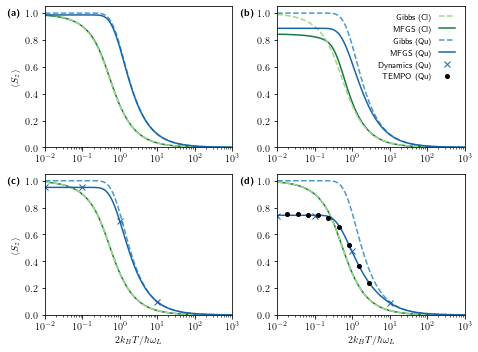

In [70]:
fig, ax = plt.subplots(2, 2, figsize=(6.7, 5))  #size in inches

bcmap = plt.get_cmap('Blues')
ocmap = plt.get_cmap('YlGn')

ax[1, 0].set_xlabel("$2k_B T/\hbar\omega_L$")
ax[1, 1].set_xlabel("$2k_B T/\hbar\omega_L$")
ax[0, 0].set_ylabel("$\langle S_z \\rangle$")
ax[1, 0].set_ylabel("$\langle S_z \\rangle$")

for i in [0, 1]:
    for j in [0, 1]:
        ax[i, j].set_xlim(1.0e-2, 1.0e3)
        ax[i, j].set_ylim(0.0, 1.05)

##### Data 1D ######

#### prmb ####

## Classical ##
ax[0, 0].semilogx(dataG_qu[:,0], ((1/np.tanh(1/dataG_qu[:,0]) - (dataG_qu[:,0]))), color=ocmap(0.4), linestyle='--', label='Gibbs (Cl)', zorder=1) # Gibbs
ax[0, 0].semilogx(data1D_pi4_prmb_cl[:,0], data1D_pi4_prmb_cl[:,3], color=ocmap(0.8), linestyle='-', label='MFGS (Cl)', zorder=0) # MFGS

## Quantum ##
ax[0, 0].semilogx(dataG_qu[:,0], dataG_qu[:,3], color=bcmap(0.6), linestyle='--', label='Gibbs (Qu)') # Gibbs
ax[0, 0].semilogx(data1D_pi4_prmb[:,0], data1D_pi4_prmb[:,3], color=bcmap(0.8), label='MFGS (Qu)') # MFGS
# ax[0].plot(0.01, 0.95, color=bcmap(0.8), marker='x', linestyle='None', label='Dynamics (Qu)') # Dynamics
# ax[0].plot(0.1, 0.95, color=bcmap(0.8), marker='x', linestyle='None')
# ax[0].plot(1, 0.70, color=bcmap(0.8), marker='x', linestyle='None')
# ax[0].plot(10, 0.10, color=bcmap(0.8), marker='x', linestyle='None')

#### prma ####

## Classical ##
ax[0, 1].semilogx(dataG_qu[:,0], ((1/np.tanh(1/dataG_qu[:,0]) - (dataG_qu[:,0]))), color=ocmap(0.4), linestyle='--', zorder=1) # Gibbs
ax[0, 1].semilogx(data1D_pi4_prma_cl[:,0], data1D_pi4_prma_cl[:,3], color=ocmap(0.8), linestyle='-', zorder=0) # MFGS

## Quantum ##
ax[0, 1].semilogx(dataG_qu[:,0], dataG_qu[:,3], color=bcmap(0.6), linestyle='--') # Gibbs
ax[0, 1].semilogx(data1D_pi4_prma[:,0], data1D_pi4_prma[:,3], color=bcmap(0.8)) # MFGS
# ax[1].plot(0.01, 0.74, color=bcmap(0.8), marker='x', linestyle='None', label='Dynamics (Qu)') # Dynamics
# ax[1].plot(0.1, 0.74, color=bcmap(0.8), marker='x') # Dynamics
# ax[1].plot(1, 0.48, color=bcmap(0.8), marker='x') # Dynamics
# ax[1].plot(10, 0.09, color=bcmap(0.8), marker='x') # Dynamics

##### Data 3D ######

#### prmb ####

## Classical ##
ax[1, 0].semilogx(dataG_qu[:,0], ((1/np.tanh(1/dataG_qu[:,0]) - (dataG_qu[:,0]))), color=ocmap(0.4), linestyle="--", zorder=1) # Gibbs
ax[1, 0].semilogx(data3D_prmb_cl[:,0], data3D_prmb_cl[:,3], color=ocmap(0.8), linestyle='-', zorder=0) # MFGS

## Quantum ##
ax[1, 0].semilogx(dataG_qu[:,0], dataG_qu[:,3], color=bcmap(0.6), linestyle="--") # Gibbs
ax[1, 0].semilogx(data3D_prmb[:,0], data3D_prmb[:,3], color=bcmap(0.8)) # MFGS
ax[1, 0].plot(0.01, 0.95, color=bcmap(0.8), marker='x', linestyle='None', label="Dynamics (Qu)") # Dynamics
ax[1, 0].plot(0.1, 0.95, color=bcmap(0.8), marker='x', linestyle='None')
ax[1, 0].plot(1, 0.70, color=bcmap(0.8), marker='x', linestyle='None')
ax[1, 0].plot(10, 0.10, color=bcmap(0.8), marker='x', linestyle='None')

#### prma ####

## Classical ##
ax[1, 1].semilogx(dataG_qu[:,0], ((1/np.tanh(1/dataG_qu[:,0]) - (dataG_qu[:,0]))), color=ocmap(0.4), linestyle="--", zorder=1) # Gibbs
ax[1, 1].semilogx(data3D_prma_cl[:,0], data3D_prma_cl[:,3], color=ocmap(0.8), linestyle='-', zorder=0) # MFGS

## Quantum ##
ax[1, 1].semilogx(dataG_qu[:,0], dataG_qu[:,3], color=bcmap(0.6), linestyle="--") # Gibbs
ax[1, 1].semilogx(data3D_prma[:,0], data3D_prma[:,3], color=bcmap(0.8)) # MFGS
ax[1, 1].plot(0.01, 0.74, color=bcmap(0.8), marker='x', linestyle='None') # Dynamics
ax[1, 1].plot(0.1, 0.74, color=bcmap(0.8), marker='x') # Dynamics
ax[1, 1].plot(1, 0.48, color=bcmap(0.8), marker='x') # Dynamics
ax[1, 1].plot(10, 0.09, color=bcmap(0.8), marker='x') # Dynamics
ax[1, 1].semilogx(data3D_prma_tempo[:,0], data3D_prma_tempo[:,1], 'ko', markersize=4, linestyle='', label="TEMPO (Qu)") # TEMPO

ax[0, 0].text(0.99e-3, 0.977, '\\textbf{(a)}')
ax[0, 1].text(0.99e-3, 0.977, '\\textbf{(b)}')
ax[1, 0].text(0.99e-3, 0.977, '\\textbf{(c)}')
ax[1, 1].text(0.99e-3, 0.977, '\\textbf{(d)}')

fig.legend(ncol=1, loc=(0.783, 0.76), frameon=False, markerfirst=False)
fig.tight_layout(w_pad = 0.4)

plt.savefig('/Users/charliehogg/Dropbox/PhD/1. 3D Project/Graphs/Paper/sz_T.pdf', dpi=300) # Export for Mac
# plt.savefig('C://Users//crh222//Dropbox//PhD//1. 3D Project//Graphs//Paper//sz_T_1D_pi4.pdf', dpi=300) # Export for Windows

### Weak

/var/folders/5j/8k1mp3zs2hv0n2d_ndw29dh40000gn/T/ipykernel_957/2296339253.py:29: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(w_pad = 0.3)


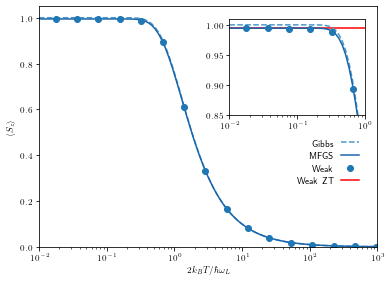

In [157]:
fig, ax = plt.subplots(1, 1, figsize=(5.5, 4))  #size in inches

matplotlib.rcParams['font.size'] = 9
matplotlib.rcParams['legend.fontsize'] = 9

bcmap = plt.get_cmap('Blues')
ocmap = plt.get_cmap('YlGn')

ax.set_xlabel("$2k_B T/\hbar\omega_L$")
ax.set_ylabel("$\langle S_z \\rangle$")

ax.set_xlim(1.0e-2, 1.0e3)
ax.set_ylim(0.0, 1.05)

ax.semilogx(dataG_qu[:,0], dataG_qu[:,3], color=bcmap(0.6), linestyle='--', label='Gibbs') # Gibbs
ax.semilogx(data3D_MFGS_wk[:,0], data3D_MFGS_wk[:,3], color=bcmap(0.8), label='MFGS') # MFGS
ax.semilogx(2*data3D_wk[:,0], 2*data3D_wk[:,1], 'o', label='Weak') # Weak Approximation

axins0 = inset_axes(ax, width="40%", height="40%", loc=1, borderpad=1.4)
axins0.axhline(0.9944444986615101, color='r', label='Weak ZT')
axins0.semilogx(dataG_qu[:,0], dataG_qu[:,3], color=bcmap(0.6), linestyle='--')
axins0.semilogx(data3D_MFGS_wk[:,0], data3D_MFGS_wk[:,3], color=bcmap(0.8))
axins0.semilogx(2*data3D_wk[:,0], 2*data3D_wk[:,1], 'o')

axins0.set_xlim(1.0e-2, 1)
axins0.set_ylim(0.85, 1.01)

fig.legend(ncol=1, frameon=False, markerfirst=False, loc=(0.75,0.33))
fig.tight_layout(w_pad = 0.3)

plt.savefig('/Users/charliehogg/Dropbox/PhD/1. 3D Project/Graphs/Paper/WK_coupling_prmc.pdf', dpi=300) # Export for Mac
# plt.savefig('C://Users//crh222//Dropbox//PhD//1. 3D Project//Graphs//Paper//sz_T_1D_pi4.pdf', dpi=300) # Export for Windows